# \[expt 05\]: \<expt_title\>

## Introduction

...

...

...

## Background

...

...

...

## Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread("../dataset/frames/train/00012/00012_1560.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Hanny')

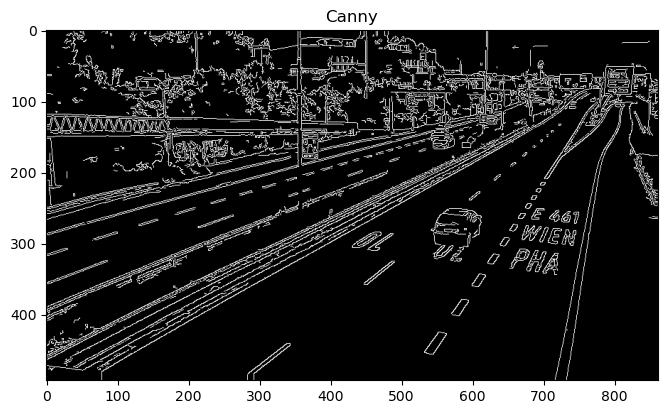

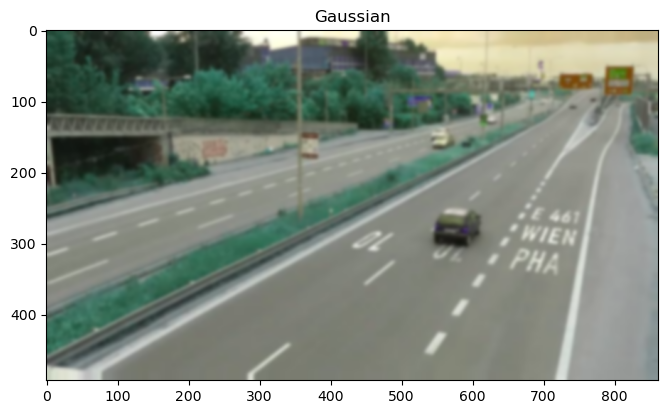

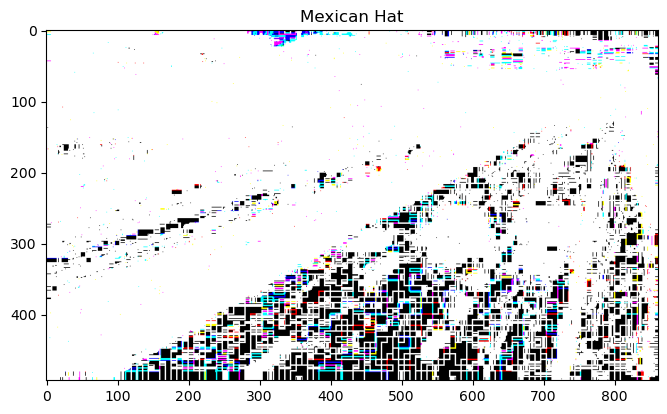

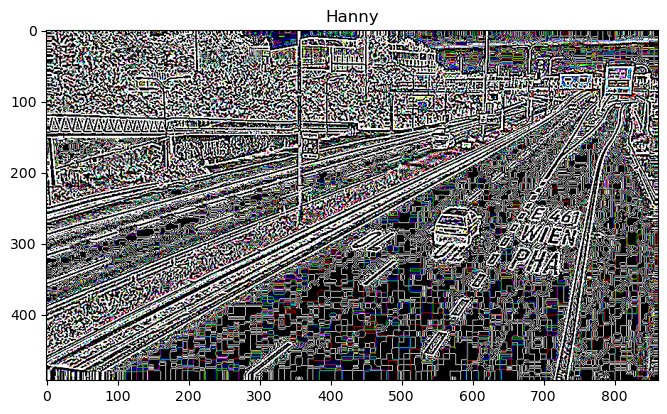

In [3]:
edges = cv2.Canny(img, 100, 200)

blurred = cv2.GaussianBlur(img, (13,13), 0)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

log = cv2.Laplacian(cv2.GaussianBlur(img, (3, 3), 0), cv2.CV_64F)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(edges,cmap='gray')
plt.title('Canny')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(blurred,cmap='gray')
plt.title('Gaussian')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(sobel_combined,cmap='gray')
plt.title('Mexican Hat')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(log,cmap='gray')
plt.title('Hanny')

Precision: 0.6735795298887732
Recall: 0.07222187952543349
F1 Score: 0.13045612154751832


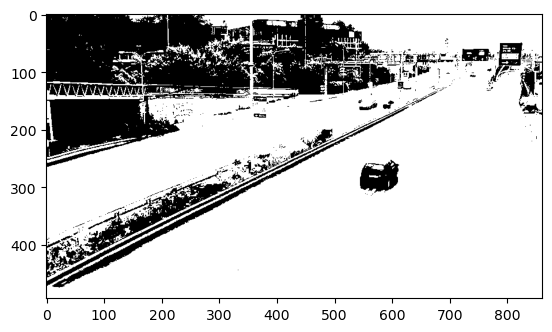

In [4]:
detected_edges = cv2.Canny(img_gray, 100, 200)

ground_truth_edges = (img_gray > 100)

TP = np.sum(np.logical_and(ground_truth_edges, detected_edges))  
FP = np.sum(np.logical_and(1 - ground_truth_edges, detected_edges)) 
FN = np.sum(np.logical_and(ground_truth_edges, 1 - detected_edges))

precision = TP / (TP + FP)
recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

plt.imshow(ground_truth_edges,cmap='gray')

Kernel size: 3, Edge Density: 814, Edge Length: 61156.1291372776
Kernel size: 5, Edge Density: 814, Edge Length: 61156.1291372776
Kernel size: 7, Edge Density: 814, Edge Length: 61156.1291372776


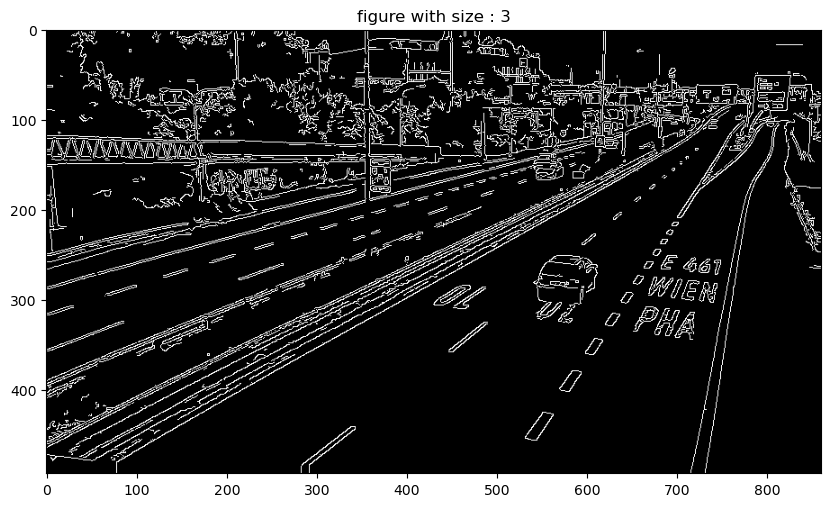

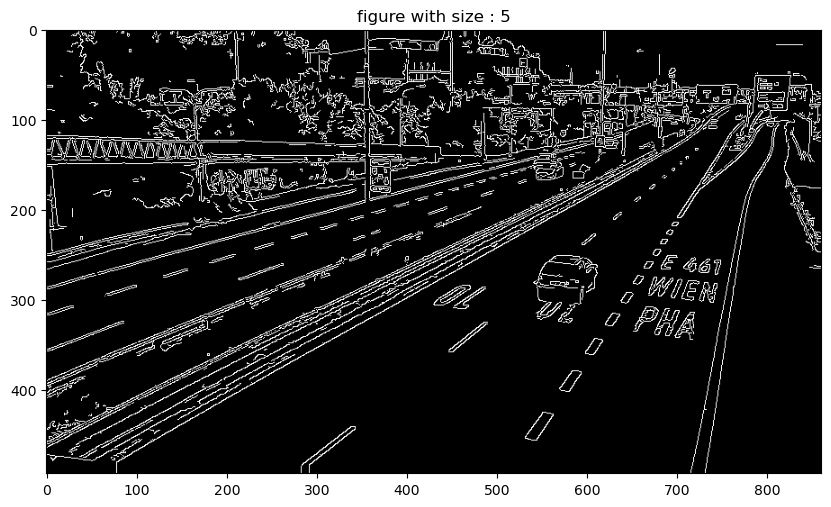

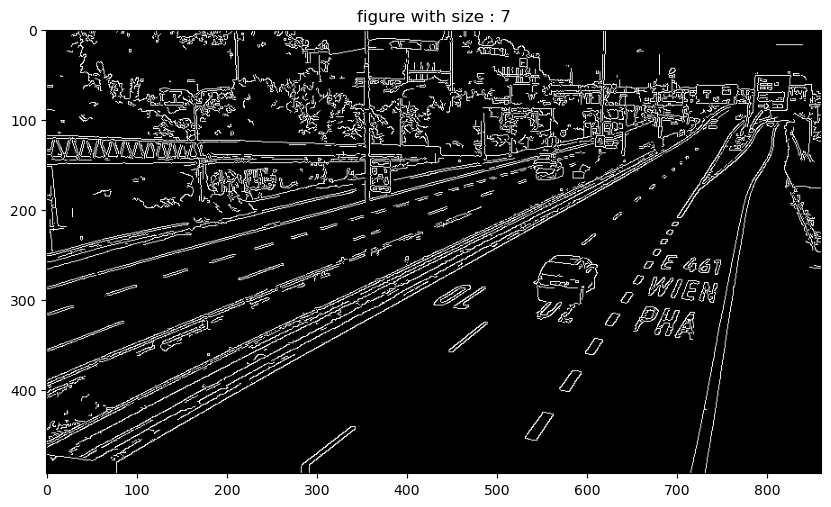

In [5]:
kernel_sizes = [3, 5, 7]

def compute_metrics(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    edge_density = len(contours)
    
    total_length = 0
    for contour in contours:
        total_length += cv2.arcLength(contour, closed=True)
    edge_length = total_length
    
    return edge_density, edge_length


for kernel_size in kernel_sizes:
    detected_edges = cv2.Canny(img_gray, 100, 200, kernel_size)

    edge_density, edge_length = compute_metrics(detected_edges)

    print(f"Kernel size: {kernel_size}, Edge Density: {edge_density}, Edge Length: {edge_length}")
    
    plt.figure(figsize=(10,8))
    plt.imshow(detected_edges,cmap='gray')
    plt.title(f"figure with size : {kernel_size}")

## Conclusion

...

...

...